In [30]:
import numpy as np
import numpy.typing as nptyping
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datasets

## `square_large`

In [31]:
square_train = pd.read_csv('data/regression/square-large-training.csv').drop(columns='Unnamed: 0')
square_test = pd.read_csv('data/regression/square-large-test.csv').drop(columns='Unnamed: 0')

In [32]:
print(square_train.shape)
print(square_test.shape)

(1000, 2)
(300, 2)


In [33]:
square_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [34]:
square_train.describe()

,x,y
count,1000.000000,1000.000000
mean,0.187488,-31.554711
std,1.029439,93.792206
min,-1.498582,-129.999517
25%,-0.714722,-115.857471
50%,0.168247,-56.018964
75%,1.089613,28.651322
max,1.997827,229.218006


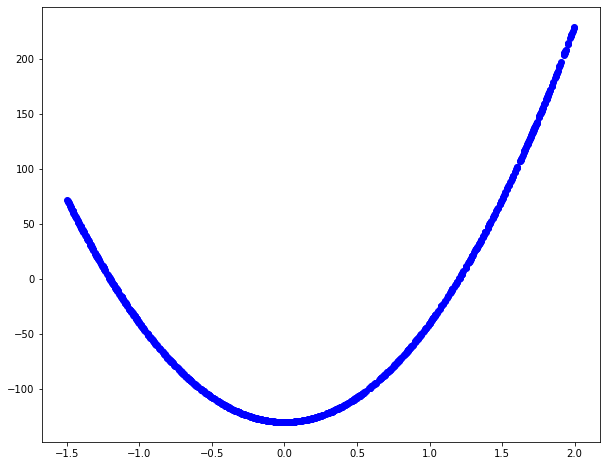

In [35]:
plt.figure(figsize=(10, 8))
plt.scatter(square_train['x'], square_train['y'], color='blue')
plt.show()

Convert data to column arrays to prevent errors when predicting:

In [36]:
x_square_train = square_train['x'].to_numpy().reshape((-1, 1))
y_square_train = square_train['y'].to_numpy().reshape((-1, 1))
x_square_test = square_test['x'].to_numpy().reshape((-1, 1))
y_square_test = square_test['y'].to_numpy().reshape((-1, 1))

## `steps_large`

In [37]:
steps_train = pd.read_csv('data/regression/steps-large-training.csv').drop(columns='Unnamed: 0')
steps_test = pd.read_csv('data/regression/steps-large-test.csv').drop(columns='Unnamed: 0')

In [38]:
print(steps_train.shape)
print(steps_test.shape)

(10000, 2)
(1000, 2)


In [39]:
steps_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10000 non-null  float64
 1   y       10000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 156.4 KB


In [40]:
steps_train.describe()

,x,y
count,10000.000000,10000.000000
mean,0.255711,23.504000
std,1.017797,82.643844
min,-1.498693,-80.000000
25%,-0.633734,-80.000000
50%,0.271821,0.000000
75%,1.135860,80.000000
max,1.999734,160.000000


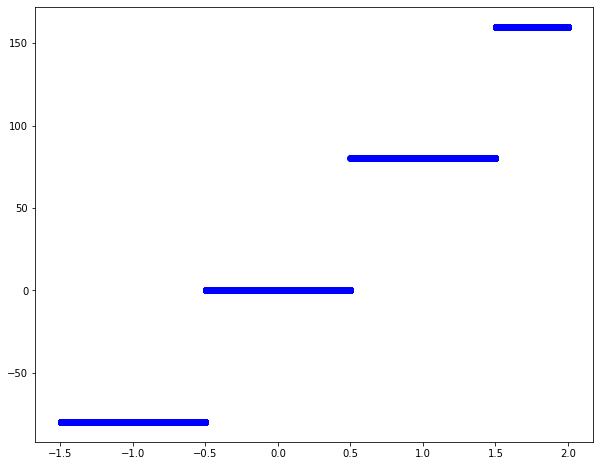

In [41]:
plt.figure(figsize=(10, 8))
plt.scatter(steps_train['x'], steps_train['y'], color='blue')
plt.show()

In [42]:
steps_train['y'].value_counts()

 80     2928
-80     2862
 0      2774
 160    1436
Name: y, dtype: int64

Convert data to column arrays to prevent errors when predicting:

In [43]:
x_steps_train = steps_train['x'].to_numpy().reshape((-1, 1))
y_steps_train = steps_train['y'].to_numpy().reshape((-1, 1))
x_steps_test = steps_test['x'].to_numpy().reshape((-1, 1))
y_steps_test = steps_test['y'].to_numpy().reshape((-1, 1))

## `multimodal_large`

In [44]:
multimodal_train = pd.read_csv('data/regression/multimodal-large-training.csv')
multimodal_test = pd.read_csv('data/regression/multimodal-large-test.csv')

In [45]:
print(multimodal_train.shape)
print(multimodal_test.shape)

(10000, 2)
(1000, 2)


In [46]:
multimodal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10000 non-null  float64
 1   y       10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


In [47]:
multimodal_train.describe()

,x,y
count,10000.000000,10000.000000
mean,0.231035,13.429036
std,1.010842,71.956903
min,-1.499971,-99.014346
25%,-0.663674,-56.540303
50%,0.236202,7.663494
75%,1.101647,97.053908
max,1.999974,100.299997


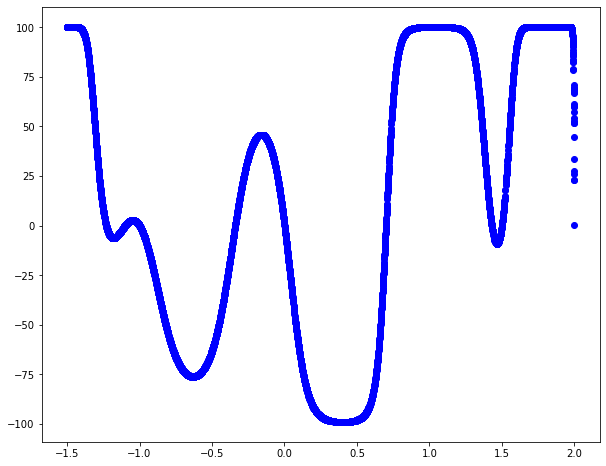

In [48]:
plt.figure(figsize=(10, 8))
plt.scatter(multimodal_train['x'], multimodal_train['y'], color='blue')
plt.show()

Convert data to column arrays to prevent errors when predicting:

In [49]:
x_multimodal_train = multimodal_train['x'].to_numpy().reshape((-1, 1))
y_multimodal_train = multimodal_train['y'].to_numpy().reshape((-1, 1))
x_multimodal_test = multimodal_test['x'].to_numpy().reshape((-1, 1))
y_multimodal_test = multimodal_test['y'].to_numpy().reshape((-1, 1))

# Utility functions

## Sigmoid activation function

In [50]:
def sigmoid(x):
    return 1 / (np.exp(-x) + 1)

## Sigmoid derivative

In [51]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

## Mean squared error

In [52]:
def mse(actual: nptyping.NDArray, predicted: nptyping.NDArray) -> float:
    n = len(actual)
    return (1/n) * np.sum((actual - predicted)**2)

# MLP implementation

In [53]:
from numpy.random import Generator, PCG64
from typing import Callable

In [54]:
class MLP:
    __slots__ = ['input_size', 'output_size', 'hidden_layers_sizes', 'activation_func', 'activation_func_deriv', 'out_func', 'weights', 'biases',
                 '__normalise_max_x', '__normalise_min_x', '__normalise_max_y', '__normalise_min_y']

    def __init__(self, input_size: int, hidden_layers_sizes: list[int], output_size: int):
        self.input_size = input_size
        self.hidden_layers_sizes = hidden_layers_sizes
        self.output_size = output_size
        self.activation_func = sigmoid
        self.activation_func_deriv = sigmoid_derivative
        self.out_func = lambda x: x  # linear
        self.__set_default_weights()
    
    def __set_default_weights(self, rng: Generator = None):
        self.weights = []
        self.biases = []

        if rng is None:
            rng = Generator(PCG64())

        # weigths are taken from normal distribution by default
        layers_sizes = [self.input_size, *self.hidden_layers_sizes, self.output_size]
        for i in range(len(layers_sizes) - 1):
            self.weights.append(
                rng.uniform(size=(layers_sizes[i], layers_sizes[i + 1]))
            )
        
        # biases are 0 by default
        for layer_size in layers_sizes[1:]:
            self.biases.append(
                np.zeros((1, layer_size))
            )

    @property
    def layers_count(self) -> int:
        return len(self.weights) + 1
    
    def visualise(self, nrow: int = None, ncol: int = None, annotate: bool = True):
        if ncol is None and nrow is None:
            nrow = 1
            ncol = self.layers_count - 1
        elif ncol is None:
            ncol = int(np.ceil((self.layers_count - 1) / nrow))
        elif nrow is None:
            nrow = int(np.ceil((self.layers_count - 1) / ncol))

        for i, weights, biases in zip(range(self.layers_count - 1), self.weights, self.biases):
            # concatenating weights & biases
            weights = weights.reshape(len(biases[0]), -1)
            biases = biases.reshape(-1, 1)
            layer = np.concatenate([weights, biases], axis=1)

            # plotting layer values on a heatmap
            plt.subplot(nrow, ncol, i + 1)
            sns.heatmap(layer, cmap='BrBG', annot=annotate)
            plot_title = f'{i} -> {i + 1}'
            if i == 0:
                plot_title = 'Input -> 1'
            elif i == self.layers_count - 2:
                plot_title = f'{i} -> Output'
            plt.title(plot_title)
        plt.show()

    def __normalise_x(self, x: nptyping.NDArray) -> nptyping.NDArray:
        return (x - self.__normalise_min_x) / (self.__normalise_max_x - self.__normalise_min_x)
    
    def __normalise_y(self, y: nptyping.NDArray) -> nptyping.NDArray:
        return (y - self.__normalise_min_y) / (self.__normalise_max_y - self.__normalise_min_y)

    def __denormalise_x(self, x: nptyping.NDArray) -> nptyping.NDArray:
        return x * (self.__normalise_max_x - self.__normalise_min_x) + self.__normalise_min_x

    def __denormalise_y(self, y: nptyping.NDArray) -> nptyping.NDArray:
        return y * (self.__normalise_max_y - self.__normalise_min_y) + self.__normalise_min_y

    def __get_rng(self, seed: int | str | None) -> Generator:
        if seed is not None:
            if type(seed) is str:
                seed = np.sum([ord(c) for c in seed])
            rng = Generator(PCG64(seed))
        else:
            rng = Generator(PCG64())
        return rng
    
    def __generate_batches(self, x: nptyping.NDArray, y: nptyping.NDArray, batch_size: int, rng: Generator) -> list[list[tuple[float, float]]]:
        # find the batch count
        batch_count = len(y) // batch_size
        # generate batches
        train_xy_pairs = np.array(list(zip(x, y)))
        rng.shuffle(train_xy_pairs)
        batches = np.array_split(train_xy_pairs, batch_count)
        return batches
    
    def __handle_verbosity(self, verbosity: bool, epoch: int, total_epochs: int,
                           x_train_pre_norm: nptyping.NDArray, y_train_pre_norm: nptyping.NDArray, 
                           x_test: nptyping.NDArray, y_test: nptyping.NDArray):
        # printing the progress every 50th epoch
        if verbosity and (epoch + 1) % 50 == 0:
            mse_train = mse(y_train_pre_norm, self.predict(x_train_pre_norm))
            text = f'Epoch {epoch + 1}/{total_epochs} done | MSE(train) = {mse_train:.2f}'
            if x_test is not None and y_test is not None:
                mse_test = mse(y_test, self.predict(x_test))
                text += f' | MSE(test) = {mse_test:.2f}'
            print(text)
    
    def __feedforward(self, x: nptyping.NDArray) -> tuple[list[nptyping.NDArray], list[nptyping.NDArray]]:
        """
        Computes and returns the values in every layer from before and after activation

        :return: A two-element tuple, where the first element is a list of values before activation,
                 and the second is a list of values after activation
        """
        prev_a = x
        z = []
        a = [x]

        for weights, biases in zip(self.weights[:-1], self.biases[:-1]):
            a_k = (prev_a @ weights) + biases
            z.append(a_k)
            prev_a = self.activation_func(a_k)
            a.append(prev_a)
        # the last iteration uses a different activation function (linear)
        a_k = (prev_a @ self.weights[-1]) + self.biases[-1]
        z.append(a_k)
        prev_a = self.out_func(a_k)
        a.append(prev_a)
        return z, a
    
    def __backpropagate(self, y: nptyping.NDArray, 
                        z: list[nptyping.NDArray], 
                        a: list[nptyping.NDArray]) -> tuple[list[nptyping.NDArray], list[nptyping.NDArray]]:
        """
        Performs backpropagation and returns weights and biases deltas

        :param z: values before activation
        :param a: values after activation
        :return: A tuple, where the first element is the weights_delta and the second one is the biases_delta
        """
        # initialise deltas to 0
        weights_delta = [np.zeros(w.shape) for w in self.weights]
        biases_delta = [np.zeros(b.shape) for b in self.biases]

        y_pred = a[-1]
        e_k = (y_pred - y) * self.activation_func_deriv(z[-1])
        weights_delta[-1] = a[-2].T @ e_k
        biases_delta[-1] = e_k
        
        for k in range(2, self.layers_count):
            e_k = self.activation_func_deriv(z[-k]) * (self.weights[-k+1] @ e_k.T).T
            weights_delta[-k] = a[-k-1].T @ e_k
            biases_delta[-k] = e_k
        
        return weights_delta, biases_delta
    
    def __summarise_training(self, mse_history: list[float], plot_mse: bool):
        min_mse = np.min(mse_history)
        min_mse_epoch = mse_history.index(min_mse)
        print(f'Minimal train MSE: {min_mse:.2f} (epoch {min_mse_epoch})')
        print(f'Final train MSE: {mse_history[-1]:.2f}')
        
        if plot_mse:
            plt.figure(figsize=(10, 8))
            plt.plot(list(range(len(mse_history))), mse_history)
            plt.yscale('log')
            plt.ylabel('MSE')
            plt.xlabel('Epoch')
            plt.show()            
    
    def __gradient_descent_basic(self, x_norm: nptyping.NDArray, y_norm: nptyping.NDArray, x_test: nptyping.NDArray, y_test: nptyping.NDArray,
                                 epochs: int, learning_rate: float | Callable, batch_size: int,
                                 rng: Generator, verbose: bool) -> list[float]:
        """
        :return: MSE values on the training dataset after every epoch
        """
        x_pre_norm = self.__denormalise_x(x_norm)
        y_pre_norm = self.__denormalise_y(y_norm)

        # train mse after every epoch
        mse_history = [mse(y_pre_norm, self.predict(x_pre_norm))]

        # adjusting weights & biases using backpropagation
        for epoch in range(epochs):
            # set the learning rate
            if type(learning_rate) is float or type(learning_rate) is int:
                lr = learning_rate
            else:
                lr = learning_rate(epoch)
            
            # generate batches
            batches = self.__generate_batches(x_norm, y_norm, batch_size, rng)

            # iterate over batches
            for batch in batches:
                # initialise deltas to 0
                weights_delta_batch = [np.zeros(w.shape) for w in self.weights]
                biases_delta_batch = [np.zeros(b.shape) for b in self.biases]

                for x, y in batch:
                    # FeedForward
                    # z - values before activation
                    # a - values after activation
                    z, a = self.__feedforward(x)

                    # Backpropagate
                    weights_update, biases_update = self.__backpropagate(y, z, a)

                    # updating deltas
                    weights_delta_batch = [w + update for w, update in zip(weights_delta_batch, weights_update)]
                    biases_delta_batch = [b + update for b, update in zip(biases_delta_batch, biases_update)]

                # updating weights
                self.weights = [w - lr * delta / len(batch) 
                                for w, delta in zip(self.weights, weights_delta_batch)]
                self.biases = [b - lr * delta / len(batch) 
                               for b, delta in zip(self.biases, biases_delta_batch)]

            # saving mse
            mse_history.append(mse(y_pre_norm, self.predict(x_pre_norm)))
            
            # printing the progress
            self.__handle_verbosity(verbosity=verbose, epoch=epoch, total_epochs=epochs,
                                    x_train_pre_norm=x_pre_norm, y_train_pre_norm=y_pre_norm, 
                                    x_test=x_test, y_test=y_test)
        
        return mse_history

    def __gradient_descent_momentum(self, x_norm: nptyping.NDArray, y_norm: nptyping.NDArray, x_test: nptyping.NDArray, y_test: nptyping.NDArray,
                                    epochs: int, learning_rate: float | Callable, batch_size: int, lambda_coef: float,
                                    rng: Generator, verbose: bool) -> list[float]:
        """
        :return: MSE values on the training dataset after every epoch
        """
        x_pre_norm = self.__denormalise_x(x_norm)
        y_pre_norm = self.__denormalise_y(y_norm)

        # train mse after every epoch
        mse_history = [mse(y_pre_norm, self.predict(x_pre_norm))]

        # momentum
        momentum_weights = [np.zeros(w.shape) for w in self.weights]
        momentum_biases = [np.zeros(b.shape) for b in self.biases]

        # adjusting weights & biases using backpropagation
        for epoch in range(epochs):
            # set the learning rate
            if type(learning_rate) is float or type(learning_rate) is int:
                lr = learning_rate
            else:
                lr = learning_rate(epoch)
            
            # initialise deltas to 0
            weights_delta = [np.zeros(w.shape) for w in self.weights]
            biases_delta = [np.zeros(b.shape) for b in self.biases]

            # generate batches
            batches = self.__generate_batches(x_norm, y_norm, batch_size, rng)

            # iterate over batches
            for batch in batches:
                # iterate over observations in a batch
                for x, y in batch:
                    # FeedForward
                    # z - values before activation
                    # a - values after activation
                    z, a = self.__feedforward(x)

                    # Backpropagate
                    weights_update, biases_update = self.__backpropagate(y, z, a)

                    # updating deltas
                    weights_delta = [w + update for w, update in zip(weights_delta, weights_update)]
                    biases_delta = [b + update for b, update in zip(biases_delta, biases_update)] 

                # updating momentum
                momentum_weights = [w - lambda_coef * momentum
                                    for w, momentum in zip(weights_delta, momentum_weights)]
                momentum_biases = [b - lambda_coef * momentum
                                for b, momentum in zip(biases_delta, momentum_biases)]
                # updating weights
                self.weights = [w - lr * momentum / len(batch)
                                for w, momentum in zip(self.weights, momentum_weights)]
                self.biases = [b - lr * momentum / len(batch)
                            for b, momentum in zip(self.biases, momentum_biases)]

            # saving mse
            mse_history.append(mse(y_pre_norm, self.predict(x_pre_norm)))

            # printing the progress
            self.__handle_verbosity(verbosity=verbose, epoch=epoch, total_epochs=epochs,
                                    x_train_pre_norm=x_pre_norm, y_train_pre_norm=y_pre_norm, 
                                    x_test=x_test, y_test=y_test)
        
        return mse_history

    def __rmsprop(self, x_norm: nptyping.NDArray, y_norm: nptyping.NDArray, x_test: nptyping.NDArray, y_test: nptyping.NDArray,
                  epochs: int, learning_rate: float | Callable, batch_size: int, beta_coef: float,
                  rng: Generator, verbose: bool) -> list[float]:
        """
        :return: MSE values on the training dataset after every epoch
        """
        x_pre_norm = self.__denormalise_x(x_norm)
        y_pre_norm = self.__denormalise_y(y_norm)

        # train mse after every epoch
        mse_history = [mse(y_pre_norm, self.predict(x_pre_norm))]

        # E[g^2]
        eg2_weights = [np.zeros(w.shape) for w in self.weights]
        eg2_biases = [np.zeros(b.shape) for b in self.biases]

        # adjusting weights & biases using backpropagation
        for epoch in range(epochs):
            # set the learning rate
            if type(learning_rate) is float or type(learning_rate) is int:
                lr = learning_rate
            else:
                lr = learning_rate(epoch)

            # generate batches
            batches = self.__generate_batches(x_norm, y_norm, batch_size, rng)

            # iterate over batches
            for batch in batches:
                # initialise g to 0
                g_weights = [np.zeros(w.shape) for w in self.weights]
                g_biases = [np.zeros(b.shape) for b in self.biases]

                # iterate over observations in a batch
                for x, y in batch:
                    # FeedForward
                    # z - values before activation
                    # a - values after activation
                    z, a = self.__feedforward(x)

                    # Backpropagate
                    weights_update, biases_update = self.__backpropagate(y, z, a)

                    # updating deltas
                    g_weights = [w + update for w, update in zip(g_weights, weights_update)]
                    g_biases = [b + update for b, update in zip(g_biases, biases_update)] 

                # updating E[g^2]
                eg2_weights = [beta_coef * eg2 + (1 - beta_coef) * g**2
                            for eg2, g in zip(eg2_weights, g_weights)]
                eg2_biases = [beta_coef * eg2 + (1 - beta_coef) * g**2
                            for eg2, g in zip(eg2_biases, g_biases)]
                # updating weights
                self.weights = [w - lr * (g / np.sqrt(eg2)) / len(batch)
                                for w, g, eg2 in zip(self.weights, g_weights, eg2_weights)]
                self.biases = [b - lr * (g / np.sqrt(eg2)) / len(batch)
                               for b, g, eg2 in zip(self.biases, g_biases, eg2_biases)]

            # saving mse
            mse_history.append(mse(y_pre_norm, self.predict(x_pre_norm)))
            
            # printing the progress
            self.__handle_verbosity(verbosity=verbose, epoch=epoch, total_epochs=epochs,
                                    x_train_pre_norm=x_pre_norm, y_train_pre_norm=y_pre_norm, 
                                    x_test=x_test, y_test=y_test)
        
        return mse_history
    
    def train(self, x_train: nptyping.NDArray, y_train: nptyping.NDArray, 
              x_test: nptyping.NDArray = None, y_test: nptyping.NDArray = None, method='basic',
              epochs: int = 1000, learning_rate: float | Callable = 0.001, 
              batch_size: int = 1, momentum_coef: float = 0.9, rmsprop_coef: float = 0.9,
              plot_mse: bool = False, random_state: int | None = None, verbose: bool = False) -> list[float]:
        """
        Attempts to find optimal weights & biases for the network

        :param method:                 a method used to find the optimal weights. Accepted values: 'basic' (basic gradient descent),
                                       'momentum' (gradient descent with momentum), 'rmsprop'.
        :param learning_rate:          a learning rate coefficient. Can be either a number or a function that takes the epoch 
                                       number as an argument and returns a float
        :param momentum_coef:          a lambda coefficient for the gradient descent with momentum algorithm. Ignored unless the method
                                       parameter is set to 'momentum'
        :param rmsprop_coef:           a beta coefficient for the RMSProp algorithm. Ignored unless the method parameter is set to 'rmsprop'
        :param random_state:           a seed passed to a random number generation (affects the randomness of generating batches and 
                                       setting initial weights & biases)
        :param plot_mse:               whether to plot MSE values per epoch after the training
        :param verbose:                whether to print the current epoch number and loss every 100th epoch

        :return:                       MSE values after every epoch
        """
        # random_state for reproducibility
        rng = self.__get_rng(random_state)
        
        # reset weights
        self.__set_default_weights(rng)

        # normalisation
        self.__normalise_max_x = np.max(x_train)
        self.__normalise_min_x = np.min(x_train)
        self.__normalise_max_y = np.max(y_train)
        self.__normalise_min_y = np.min(y_train)
        x_norm = self.__normalise_x(x_train)
        y_norm = self.__normalise_y(y_train)

        # finding the best weights & biases
        if method == 'basic':
            mse_history = self.__gradient_descent_basic(
                x_norm=x_norm, y_norm=y_norm, x_test=x_test, y_test=y_test,
                epochs=epochs, learning_rate=learning_rate,
                batch_size=batch_size, 
                rng=rng, verbose=verbose,
            )
        elif method == 'momentum':
            mse_history = self.__gradient_descent_momentum(
                x_norm=x_norm, y_norm=y_norm, x_test=x_test, y_test=y_test,
                epochs=epochs, learning_rate=learning_rate,
                batch_size=batch_size, lambda_coef=momentum_coef, 
                rng=rng, verbose=verbose,
            )
        elif method == 'rmsprop':
            mse_history = self.__rmsprop(
                x_norm=x_norm, y_norm=y_norm, x_test=x_test, y_test=y_test,
                epochs=epochs, learning_rate=learning_rate,
                batch_size=batch_size, beta_coef=rmsprop_coef, 
                rng=rng, verbose=verbose,
            )
        else:
            raise ValueError('Wrong value for the method parameter. Possible values: "basic", "momentum", "rmsprop"')

        # summary
        self.__summarise_training(mse_history, plot_mse)
        return mse_history

    def predict(self, x: nptyping.NDArray) -> nptyping.NDArray:
        # normalisation
        x = self.__normalise_x(x)
            
        # prediction
        _, activations = self.__feedforward(x)
        y = activations[-1]

        # denormalisation
        y = self.__denormalise_y(y)

        return y

# Models training

## `square_large`

### Gradient descent with momentum

In [62]:
mlp_square_momentum = MLP(1, [5], 1)

Epoch 50/1944 done | MSE(train) = 6241.70 | MSE(test) = 13057.60
Epoch 100/1944 done | MSE(train) = 53.70 | MSE(test) = 443.95
Epoch 150/1944 done | MSE(train) = 30.20 | MSE(test) = 241.27
Epoch 200/1944 done | MSE(train) = 22.35 | MSE(test) = 179.98
Epoch 250/1944 done | MSE(train) = 18.03 | MSE(test) = 154.64
Epoch 300/1944 done | MSE(train) = 15.01 | MSE(test) = 109.05
Epoch 350/1944 done | MSE(train) = 11.01 | MSE(test) = 91.31
Epoch 400/1944 done | MSE(train) = 9.00 | MSE(test) = 70.48
Epoch 450/1944 done | MSE(train) = 7.69 | MSE(test) = 58.59
Epoch 500/1944 done | MSE(train) = 6.11 | MSE(test) = 47.17
Epoch 550/1944 done | MSE(train) = 5.16 | MSE(test) = 39.69
Epoch 600/1944 done | MSE(train) = 4.35 | MSE(test) = 31.95
Epoch 650/1944 done | MSE(train) = 3.51 | MSE(test) = 26.84
Epoch 700/1944 done | MSE(train) = 3.31 | MSE(test) = 25.24
Epoch 750/1944 done | MSE(train) = 2.75 | MSE(test) = 16.64
Epoch 800/1944 done | MSE(train) = 2.27 | MSE(test) = 16.10
Epoch 850/1944 done | MS

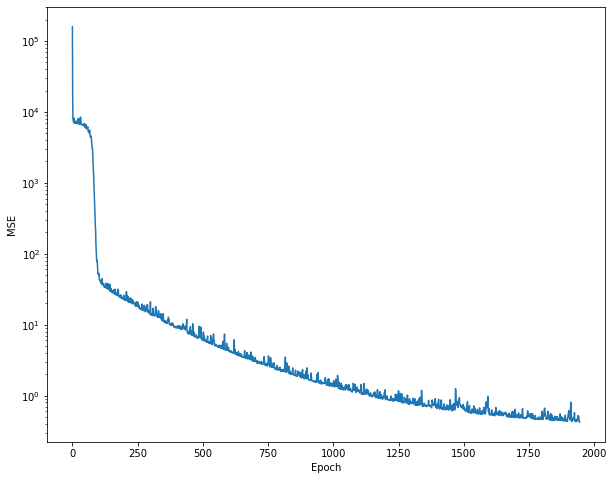

In [63]:
mse_square_momentum = mlp_square_momentum.train(
    x_square_train, y_square_train, method='momentum',
    x_test=x_square_test, y_test=y_square_test,
    epochs=1944, learning_rate=0.1, batch_size=16, momentum_coef=0.4,
    plot_mse=True, random_state=33, verbose=True,
)

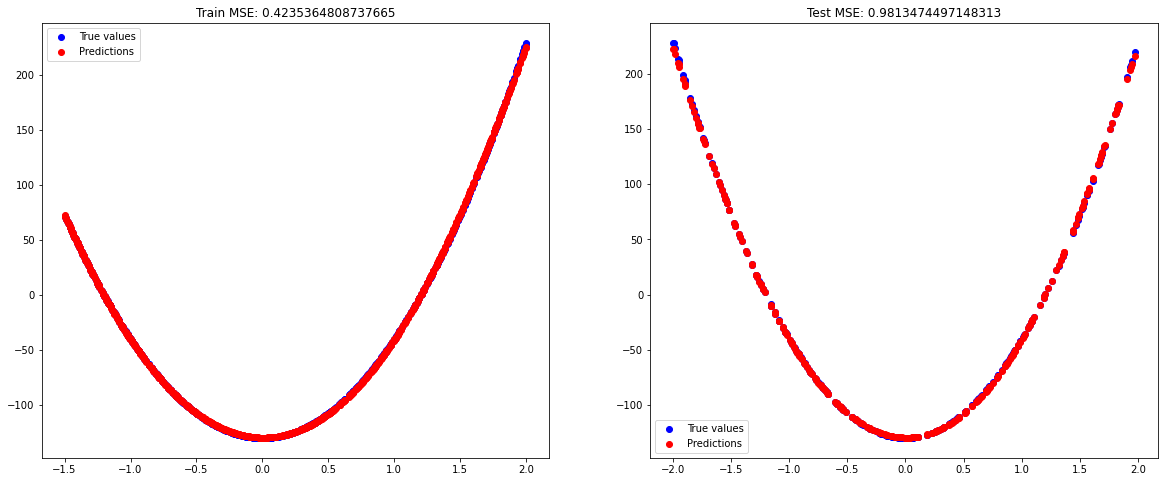

In [64]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(x_square_train, y_square_train, color='blue', label='True values')
plt.scatter(x_square_train, mlp_square_momentum.predict(x_square_train), color='red', label='Predictions')
plt.title(f'Train MSE: {mse(y_square_train, mlp_square_momentum.predict(x_square_train))}')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_square_test, y_square_test, color='blue', label='True values')
plt.scatter(x_square_test, mlp_square_momentum.predict(x_square_test), color='red', label='Predictions')
plt.title(f'Test MSE: {mse(y_square_test, mlp_square_momentum.predict(x_square_test))}')
plt.legend()

plt.show()

### RMSProp

In [65]:
mlp_square_rmsprop = MLP(1, [5], 1)

Epoch 50/1944 done | MSE(train) = 6712.00 | MSE(test) = 13139.30
Epoch 100/1944 done | MSE(train) = 53.29 | MSE(test) = 445.03
Epoch 150/1944 done | MSE(train) = 29.84 | MSE(test) = 243.96
Epoch 200/1944 done | MSE(train) = 23.96 | MSE(test) = 115.90
Epoch 250/1944 done | MSE(train) = 9.15 | MSE(test) = 106.75
Epoch 300/1944 done | MSE(train) = 13.28 | MSE(test) = 84.62
Epoch 350/1944 done | MSE(train) = 9.91 | MSE(test) = 72.59
Epoch 400/1944 done | MSE(train) = 19.83 | MSE(test) = 78.68
Epoch 450/1944 done | MSE(train) = 16.22 | MSE(test) = 69.09
Epoch 500/1944 done | MSE(train) = 19.66 | MSE(test) = 57.20
Epoch 550/1944 done | MSE(train) = 5.81 | MSE(test) = 31.71
Epoch 600/1944 done | MSE(train) = 10.23 | MSE(test) = 34.90
Epoch 650/1944 done | MSE(train) = 12.60 | MSE(test) = 36.41
Epoch 700/1944 done | MSE(train) = 10.18 | MSE(test) = 35.14
Epoch 750/1944 done | MSE(train) = 4.41 | MSE(test) = 29.24
Epoch 800/1944 done | MSE(train) = 9.11 | MSE(test) = 33.41
Epoch 850/1944 done |

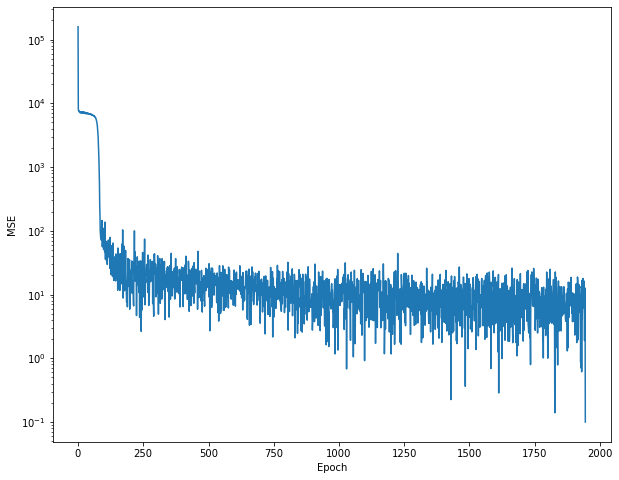

In [66]:
mse_square_rmsprop = mlp_square_rmsprop.train(
    x_square_train, y_square_train, method='rmsprop',
    x_test=x_square_test, y_test=y_square_test,
    epochs=1944, learning_rate=0.1, batch_size=16, rmsprop_coef=0.8,
    plot_mse=True, random_state=33, verbose=True,
)

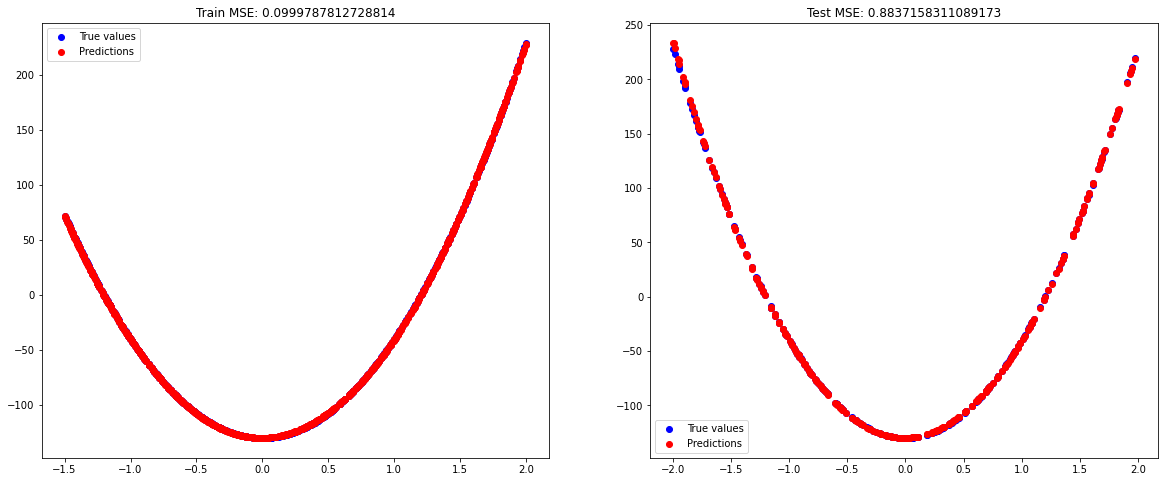

In [67]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(x_square_train, y_square_train, color='blue', label='True values')
plt.scatter(x_square_train, mlp_square_rmsprop.predict(x_square_train), color='red', label='Predictions')
plt.title(f'Train MSE: {mse(y_square_train, mlp_square_rmsprop.predict(x_square_train))}')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_square_test, y_square_test, color='blue', label='True values')
plt.scatter(x_square_test, mlp_square_rmsprop.predict(x_square_test), color='red', label='Predictions')
plt.title(f'Test MSE: {mse(y_square_test, mlp_square_rmsprop.predict(x_square_test))}')
plt.legend()

plt.show()

### Comparison

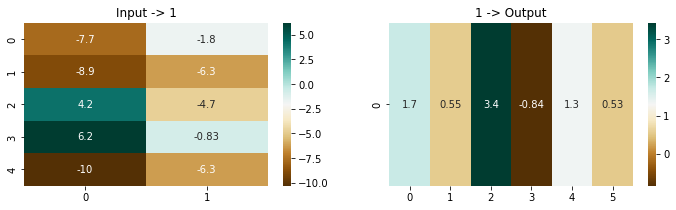

In [68]:
plt.figure(figsize=(12, 3))
mlp_square_rmsprop.visualise()

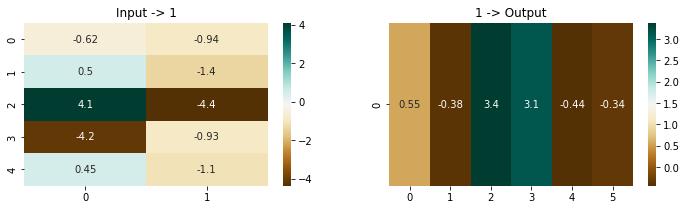

In [69]:
plt.figure(figsize=(12, 3))
mlp_square_momentum.visualise()

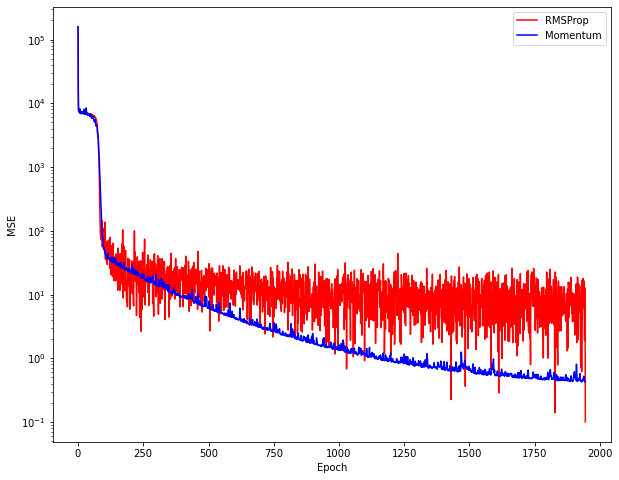

In [70]:
plt.figure(figsize=(10, 8))

plt.plot(list(range(len(mse_square_rmsprop))), mse_square_rmsprop, color='red', label='RMSProp')
plt.plot(list(range(len(mse_square_momentum))), mse_square_momentum, color='blue', label='Momentum')
plt.yscale('log')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## `steps_large`

### Gradient descent with momentum

In [153]:
mlp_steps_momentum = MLP(1, [15, 15], 1)

Epoch 50/5000 done | MSE(train) = 488.15 | MSE(test) = 497.25
Epoch 100/5000 done | MSE(train) = 517.41 | MSE(test) = 519.17
Epoch 150/5000 done | MSE(train) = 486.81 | MSE(test) = 496.80
Epoch 200/5000 done | MSE(train) = 514.48 | MSE(test) = 531.62
Epoch 250/5000 done | MSE(train) = 425.90 | MSE(test) = 430.19
Epoch 300/5000 done | MSE(train) = 416.97 | MSE(test) = 421.52
Epoch 350/5000 done | MSE(train) = 398.89 | MSE(test) = 399.85
Epoch 400/5000 done | MSE(train) = 344.94 | MSE(test) = 341.84
Epoch 450/5000 done | MSE(train) = 397.62 | MSE(test) = 400.46
Epoch 500/5000 done | MSE(train) = 365.34 | MSE(test) = 365.55
Epoch 550/5000 done | MSE(train) = 312.03 | MSE(test) = 309.39
Epoch 600/5000 done | MSE(train) = 307.76 | MSE(test) = 308.07
Epoch 650/5000 done | MSE(train) = 281.02 | MSE(test) = 283.60
Epoch 700/5000 done | MSE(train) = 384.55 | MSE(test) = 400.46
Epoch 750/5000 done | MSE(train) = 162.39 | MSE(test) = 155.45
Epoch 800/5000 done | MSE(train) = 170.34 | MSE(test) = 

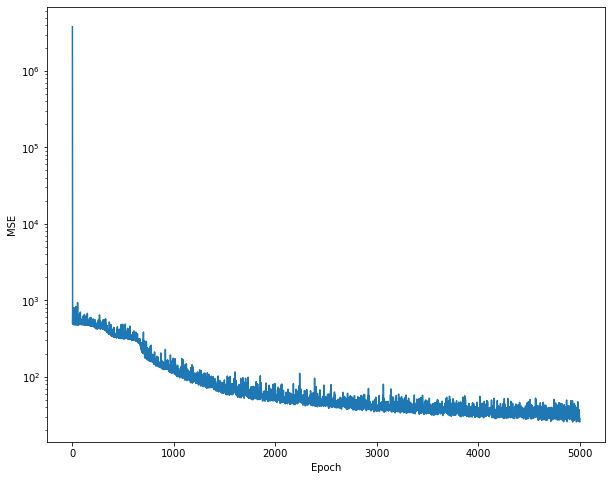

In [154]:
mse_steps_momentum = mlp_steps_momentum.train(
    x_steps_train, y_steps_train, method='momentum',
    x_test=x_steps_test, y_test=y_steps_test,
    epochs=5000, learning_rate=0.05, batch_size=16, momentum_coef=0.9, 
    plot_mse=True, random_state=19, verbose=True,
)

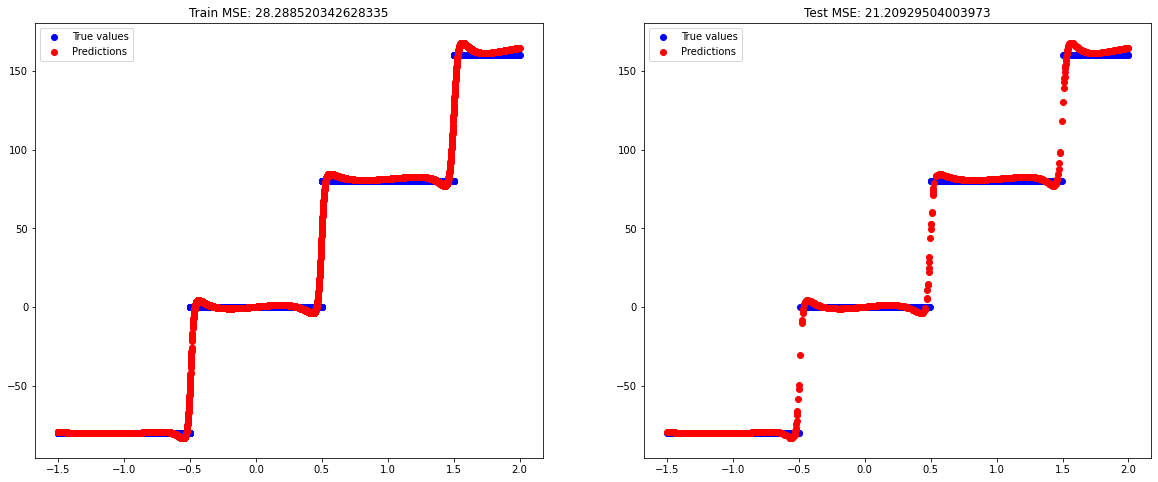

In [155]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(x_steps_train, y_steps_train, color='blue', label='True values')
plt.scatter(x_steps_train, mlp_steps_momentum.predict(x_steps_train), color='red', label='Predictions')
plt.title(f'Train MSE: {mse(y_steps_train, mlp_steps_momentum.predict(x_steps_train))}')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_steps_test, y_steps_test, color='blue', label='True values')
plt.scatter(x_steps_test, mlp_steps_momentum.predict(x_steps_test), color='red', label='Predictions')
plt.title(f'Test MSE: {mse(y_steps_test, mlp_steps_momentum.predict(x_steps_test))}')
plt.legend()

plt.show()

### RMSProp

In [158]:
mlp_steps_rmsprop = MLP(1, [15, 15], 1)

Epoch 50/4950 done | MSE(train) = 633.98 | MSE(test) = 653.58
Epoch 100/4950 done | MSE(train) = 412.19 | MSE(test) = 410.81
Epoch 150/4950 done | MSE(train) = 245.30 | MSE(test) = 245.45
Epoch 200/4950 done | MSE(train) = 121.22 | MSE(test) = 119.20
Epoch 250/4950 done | MSE(train) = 142.84 | MSE(test) = 155.22
Epoch 300/4950 done | MSE(train) = 75.68 | MSE(test) = 70.50
Epoch 350/4950 done | MSE(train) = 90.81 | MSE(test) = 77.71
Epoch 400/4950 done | MSE(train) = 58.01 | MSE(test) = 60.76
Epoch 450/4950 done | MSE(train) = 56.98 | MSE(test) = 58.77
Epoch 500/4950 done | MSE(train) = 49.56 | MSE(test) = 49.93
Epoch 550/4950 done | MSE(train) = 59.53 | MSE(test) = 51.74
Epoch 600/4950 done | MSE(train) = 45.26 | MSE(test) = 47.38
Epoch 650/4950 done | MSE(train) = 42.31 | MSE(test) = 36.65
Epoch 700/4950 done | MSE(train) = 57.93 | MSE(test) = 64.17
Epoch 750/4950 done | MSE(train) = 54.13 | MSE(test) = 55.99
Epoch 800/4950 done | MSE(train) = 44.21 | MSE(test) = 42.65
Epoch 850/4950 

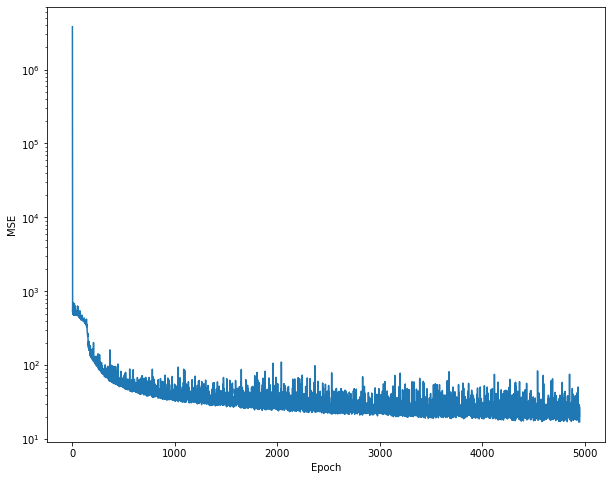

In [159]:
mse_steps_rmsprop = mlp_steps_rmsprop.train(
    x_steps_train, y_steps_train, method='rmsprop',
    x_test=x_steps_test, y_test=y_steps_test,
    epochs=4950, learning_rate=0.05, batch_size=16, rmsprop_coef=0.9, 
    plot_mse=True, random_state=19, verbose=True,
)

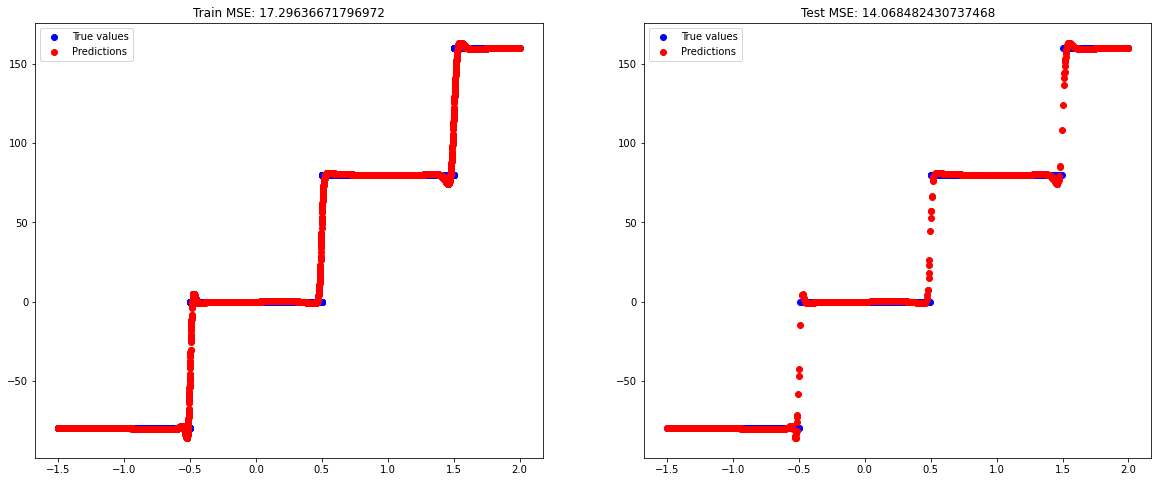

In [160]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(x_steps_train, y_steps_train, color='blue', label='True values')
plt.scatter(x_steps_train, mlp_steps_rmsprop.predict(x_steps_train), color='red', label='Predictions')
plt.title(f'Train MSE: {mse(y_steps_train, mlp_steps_rmsprop.predict(x_steps_train))}')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_steps_test, y_steps_test, color='blue', label='True values')
plt.scatter(x_steps_test, mlp_steps_rmsprop.predict(x_steps_test), color='red', label='Predictions')
plt.title(f'Test MSE: {mse(y_steps_test, mlp_steps_rmsprop.predict(x_steps_test))}')
plt.legend()

plt.show()

### Comparison

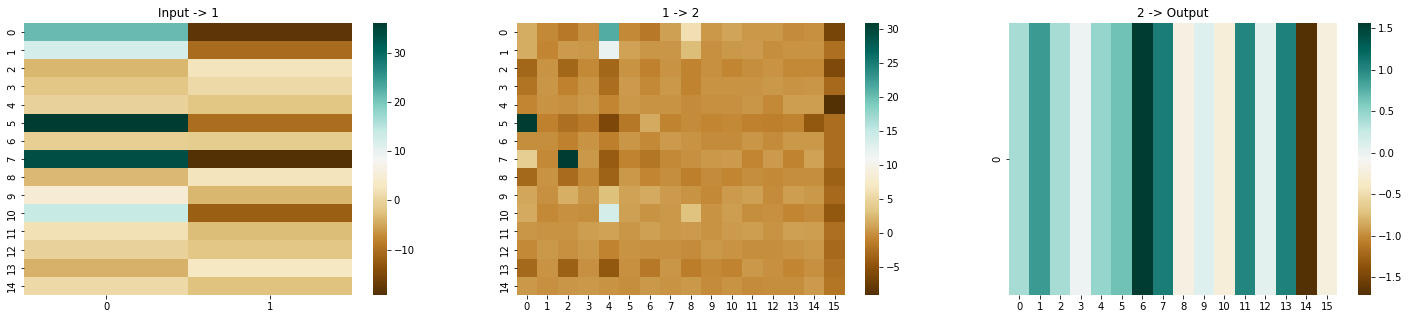

In [161]:
plt.figure(figsize=(25, 5))
mlp_steps_momentum.visualise(annotate=False)

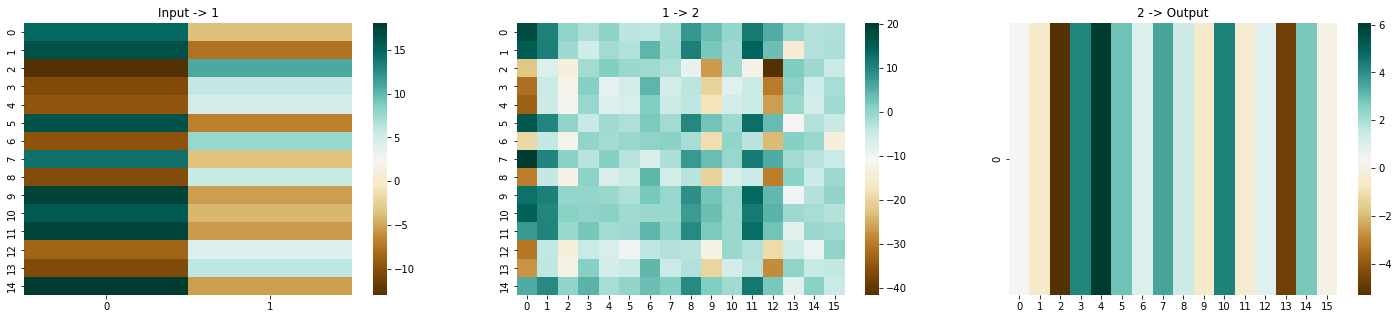

In [162]:
plt.figure(figsize=(25, 5))
mlp_steps_rmsprop.visualise(annotate=False)

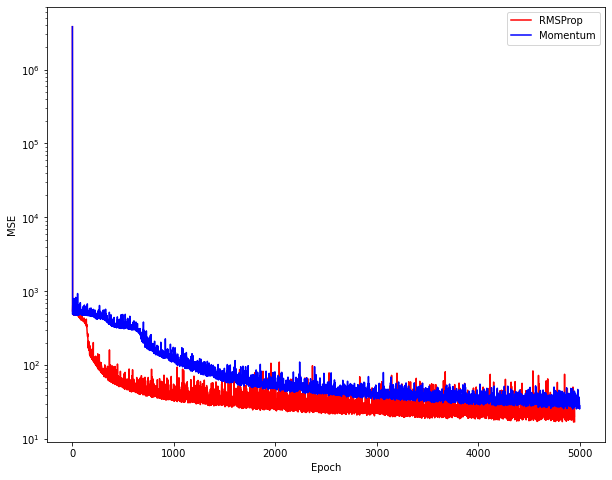

In [163]:
plt.figure(figsize=(10, 8))

plt.plot(list(range(len(mse_steps_rmsprop))), mse_steps_rmsprop, color='red', label='RMSProp')
plt.plot(list(range(len(mse_steps_momentum))), mse_steps_momentum, color='blue', label='Momentum')
plt.yscale('log')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## `multimodal_large`

### Gradient descent with momentum

In [49]:
mlp_multimodal_momentum = MLP(1, [5, 5, 5, 5], 1)

Epoch 50/1100 done | MSE(train) = 1128.31 | MSE(test) = 1208.71
Epoch 100/1100 done | MSE(train) = 177.84 | MSE(test) = 176.06
Epoch 150/1100 done | MSE(train) = 49.68 | MSE(test) = 44.27
Epoch 200/1100 done | MSE(train) = 23.74 | MSE(test) = 19.43
Epoch 250/1100 done | MSE(train) = 14.58 | MSE(test) = 9.64
Epoch 300/1100 done | MSE(train) = 16.02 | MSE(test) = 12.45
Epoch 350/1100 done | MSE(train) = 10.02 | MSE(test) = 5.66
Epoch 400/1100 done | MSE(train) = 8.96 | MSE(test) = 4.48
Epoch 450/1100 done | MSE(train) = 9.80 | MSE(test) = 5.74
Epoch 500/1100 done | MSE(train) = 8.47 | MSE(test) = 4.47
Epoch 550/1100 done | MSE(train) = 8.14 | MSE(test) = 3.84
Epoch 600/1100 done | MSE(train) = 9.16 | MSE(test) = 5.09
Epoch 650/1100 done | MSE(train) = 8.61 | MSE(test) = 4.45
Epoch 700/1100 done | MSE(train) = 8.17 | MSE(test) = 4.11
Epoch 750/1100 done | MSE(train) = 8.40 | MSE(test) = 4.17
Epoch 800/1100 done | MSE(train) = 8.41 | MSE(test) = 4.24
Epoch 850/1100 done | MSE(train) = 8.71

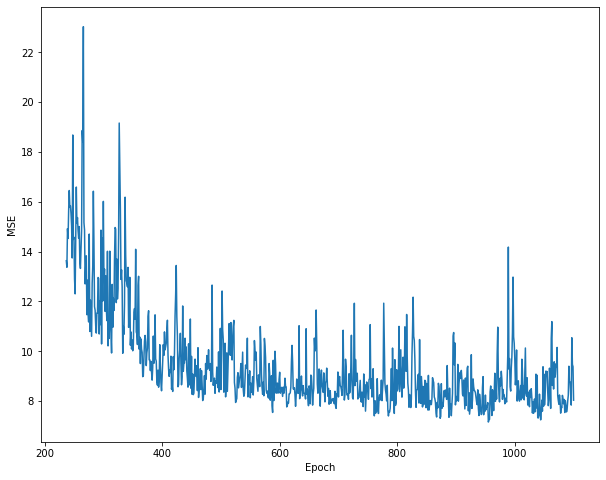

In [50]:
mse_multimodal_momentum = mlp_multimodal_momentum.train(
    x_multimodal_train, y_multimodal_train, method='momentum',
    x_test=x_multimodal_test, y_test=y_multimodal_test,
    epochs=1100, learning_rate=0.08, batch_size=16, momentum_coef=0.9, 
    plot_mse=True, random_state=28, verbose=True,
)

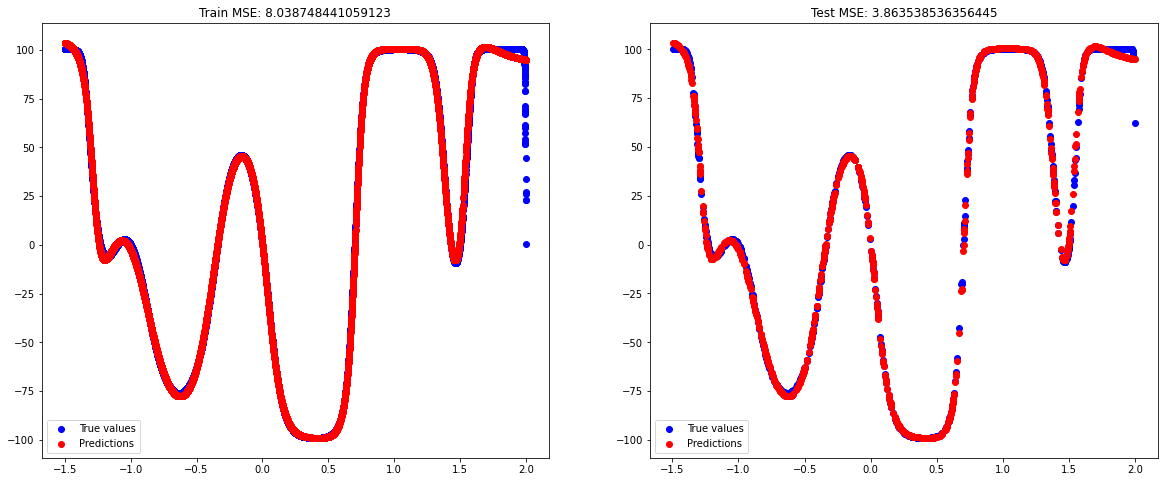

In [51]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(x_multimodal_train, y_multimodal_train, color='blue', label='True values')
plt.scatter(x_multimodal_train, mlp_multimodal_momentum.predict(x_multimodal_train), color='red', label='Predictions')
plt.title(f'Train MSE: {mse(y_multimodal_train, mlp_multimodal_momentum.predict(x_multimodal_train))}')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_multimodal_test, y_multimodal_test, color='blue', label='True values')
plt.scatter(x_multimodal_test, mlp_multimodal_momentum.predict(x_multimodal_test), color='red', label='Predictions')
plt.title(f'Test MSE: {mse(y_multimodal_test, mlp_multimodal_momentum.predict(x_multimodal_test))}')
plt.legend()

plt.show()

### RMSProp

In [52]:
mlp_multimodal_rmsprop = MLP(1, [5, 5, 5, 5], 1)

Epoch 50/1100 done | MSE(train) = 222.27 | MSE(test) = 220.38
Epoch 100/1100 done | MSE(train) = 115.02 | MSE(test) = 109.40
Epoch 150/1100 done | MSE(train) = 39.50 | MSE(test) = 33.59
Epoch 200/1100 done | MSE(train) = 28.12 | MSE(test) = 25.11
Epoch 250/1100 done | MSE(train) = 28.10 | MSE(test) = 23.03
Epoch 300/1100 done | MSE(train) = 30.04 | MSE(test) = 23.81
Epoch 350/1100 done | MSE(train) = 10.25 | MSE(test) = 5.13
Epoch 400/1100 done | MSE(train) = 10.75 | MSE(test) = 5.59
Epoch 450/1100 done | MSE(train) = 12.54 | MSE(test) = 8.05
Epoch 500/1100 done | MSE(train) = 20.17 | MSE(test) = 13.67
Epoch 550/1100 done | MSE(train) = 13.06 | MSE(test) = 7.32
Epoch 600/1100 done | MSE(train) = 9.28 | MSE(test) = 4.15
Epoch 650/1100 done | MSE(train) = 14.92 | MSE(test) = 10.26
Epoch 700/1100 done | MSE(train) = 10.38 | MSE(test) = 5.38
Epoch 750/1100 done | MSE(train) = 9.62 | MSE(test) = 4.86
Epoch 800/1100 done | MSE(train) = 15.42 | MSE(test) = 10.16
Epoch 850/1100 done | MSE(trai

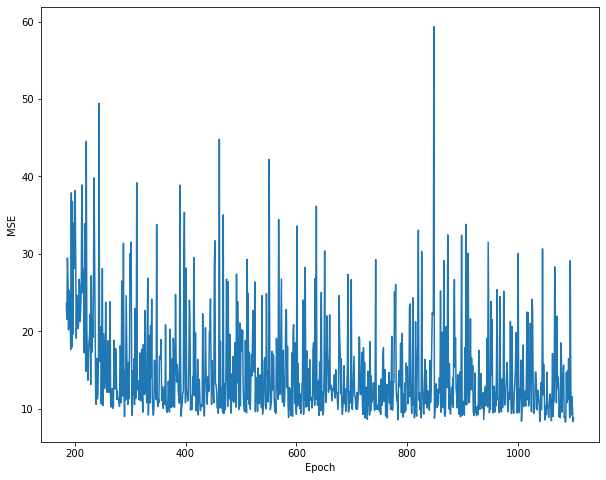

In [53]:
mse_multimodal_rmsprop = mlp_multimodal_rmsprop.train(
    x_multimodal_train, y_multimodal_train, method='rmsprop',
    x_test=x_multimodal_test, y_test=y_multimodal_test,
    epochs=1100, learning_rate=0.04, batch_size=8, rmsprop_coef=0.9, 
    plot_mse=True, random_state=28, verbose=True,
)

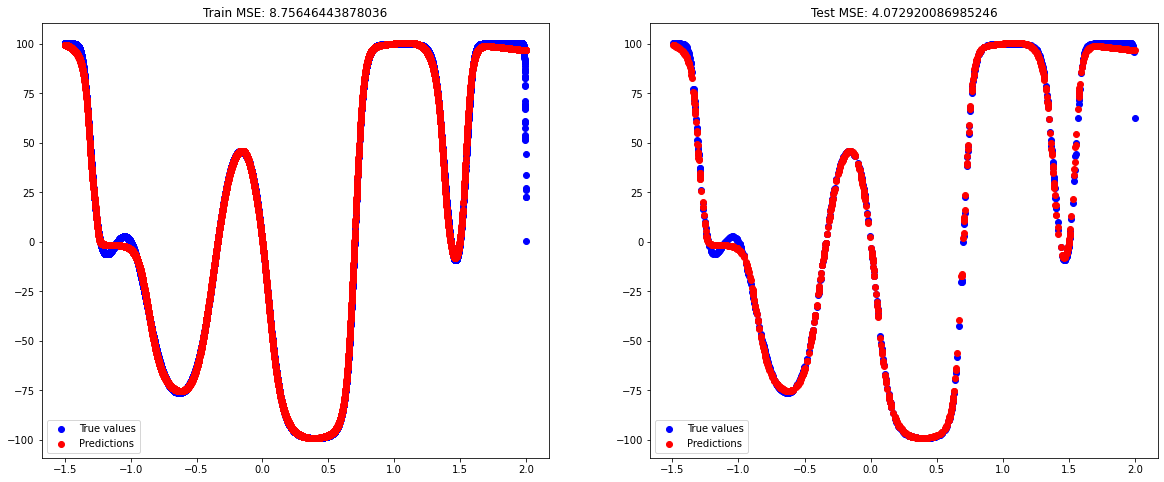

In [54]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(x_multimodal_train, y_multimodal_train, color='blue', label='True values')
plt.scatter(x_multimodal_train, mlp_multimodal_rmsprop.predict(x_multimodal_train), color='red', label='Predictions')
plt.title(f'Train MSE: {mse(y_multimodal_train, mlp_multimodal_rmsprop.predict(x_multimodal_train))}')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_multimodal_test, y_multimodal_test, color='blue', label='True values')
plt.scatter(x_multimodal_test, mlp_multimodal_rmsprop.predict(x_multimodal_test), color='red', label='Predictions')
plt.title(f'Test MSE: {mse(y_multimodal_test, mlp_multimodal_rmsprop.predict(x_multimodal_test))}')
plt.legend()

plt.show()

### Comparison

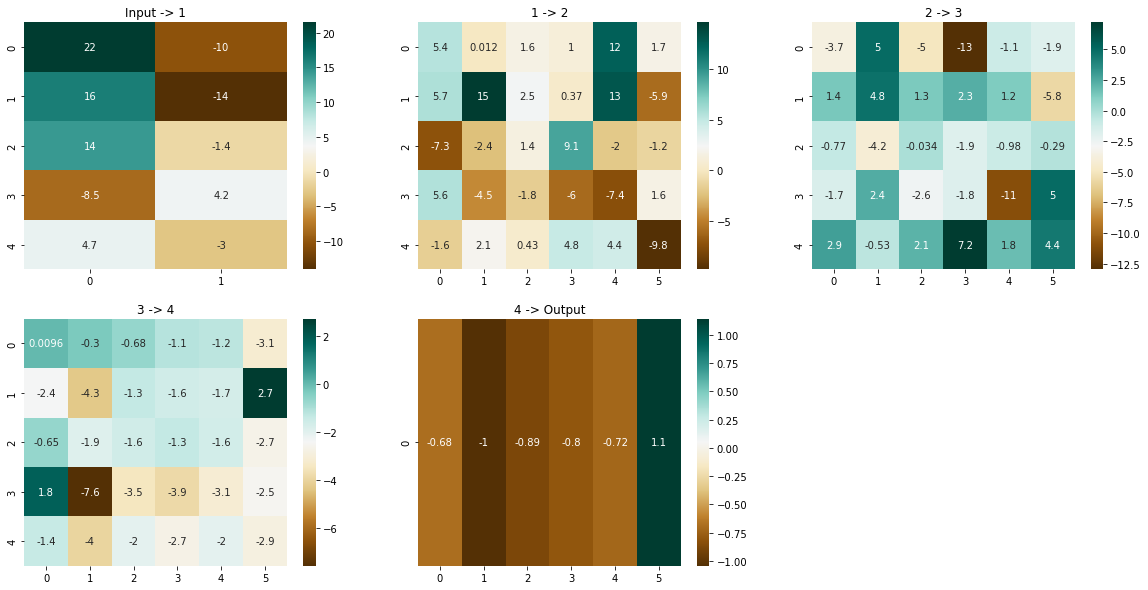

In [58]:
plt.figure(figsize=(20, 10))
mlp_multimodal_momentum.visualise(ncol=3)

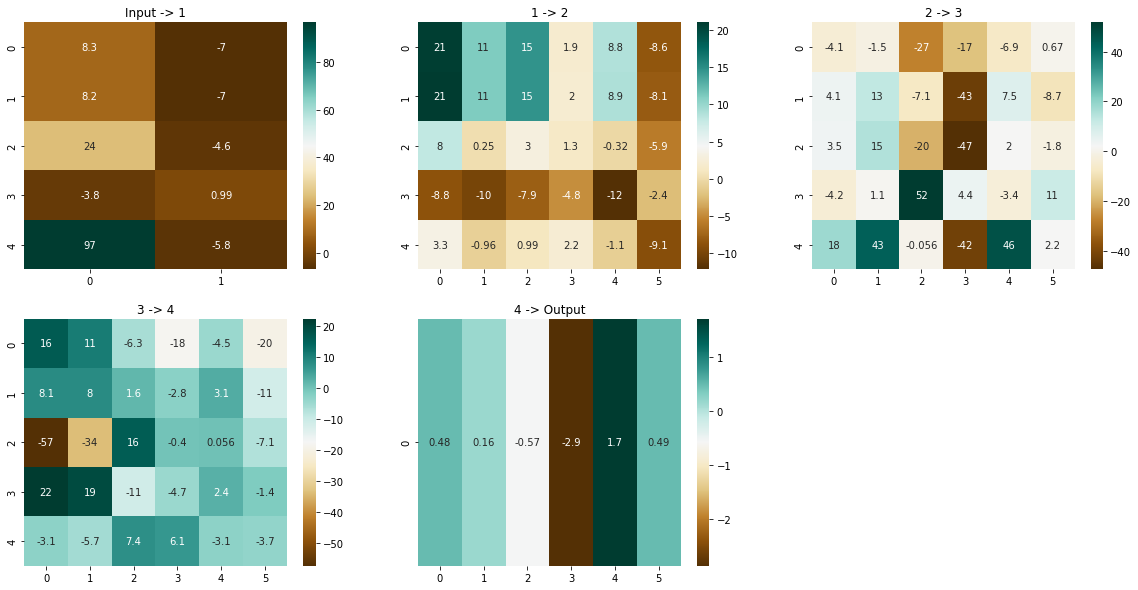

In [59]:
plt.figure(figsize=(20, 10))
mlp_multimodal_rmsprop.visualise(ncol=3)

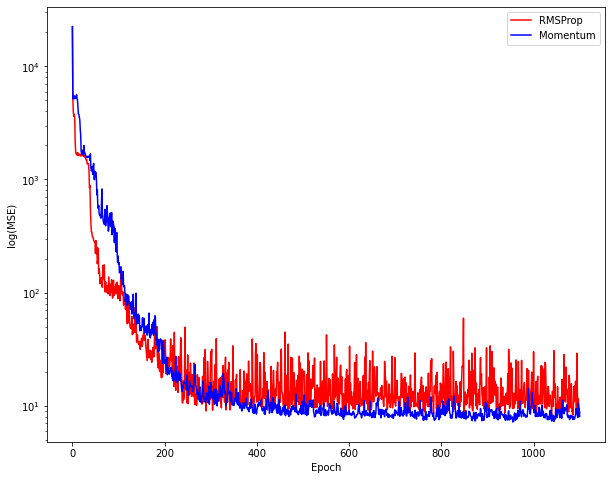

In [60]:
plt.figure(figsize=(10, 8))

plt.plot(list(range(len(mse_multimodal_rmsprop))), mse_multimodal_rmsprop, color='red', label='RMSProp')
plt.plot(list(range(len(mse_multimodal_momentum))), mse_multimodal_momentum, color='blue', label='Momentum')
plt.yscale('log')
plt.ylabel('log(MSE)')
plt.xlabel('Epoch')
plt.legend()

plt.show()